In [105]:
# Librerias utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from geodatasets import get_path
import geodatasets
from shapely.geometry import Polygon, LineString, Point
import shapely
import folium
pd.options.display.max_columns = None

# Librerías de estimación Sklearn
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV # Validación cruzada
from sklearn.model_selection import LeaveOneOut #Método para pocos registros de datos
import warnings
warnings.filterwarnings('ignore') #Ignorar las advertencias

1. Relacionamiento espacial

###### Centrogría > Promedio, mediana, desviación estándar

###### Patrones > Aleatorios, Dispersos o agregados
###### Promedio > Foco
###### Mediana > Foco no afectado por datos atípicos

<img src=https://www.researchgate.net/publication/330028157/figure/fig1/AS:710079208775680@1546307484316/Global-Morans-I-analysis-result.png>

###### Análisis de patrones > 1. Métodos basados en la distancia 2. Métodos de densidad

<ol>
    <li>La selección del tipo de distancia aplicada: euclidiana, Manhattan, viaje del tiempo o distancia inversa</li>
    <li>Definición de la contigüidad: poligonos compartidos en bordes comunes o poligonos predefinidos en alguna zona</li>
    <li>Selección del número de vecinos para análisis estadísticos: 10, 100, ...</li>
    <li>Selección del vecino más cercano: por distancia o por contigüidad</li>
</ol>

2. Mediciones de distancia

<img src='https://live.staticflickr.com/65535/40733598823_0eede41717_b.jpg'>

3. Análisis de patrones de puntos

###### Análisis de patrones de puntos > 1. Métodos basados en la distancia 2. Métodos badasos en la densidad

###### Concentraciones de altos como picos, concentraciones bajas como valles

<font style="font-size:1.5em; color:green"> Taller 2 </font> 

<p>A partir de la información suministrada en la clase 2 de la asignatura va a realizar un análisis de la información que le proporcione el promedio, la mediana, la desviación estandar, el histograma y el análisis de densidad. Para ello va a seleccionar un conjunto de datos de la librería "geodatasets".</p>

In [20]:
gdf = gpd.read_file(get_path("GeoDa houston"))

Extracting 'houston_hom/hou_hom.geojson' from 'C:\Users\Jhernandez\AppData\Local\geodatasets\geodatasets\Cache\houston_hom.zip' to 'C:\Users\Jhernandez\AppData\Local\geodatasets\geodatasets\Cache\houston_hom.zip.unzip'


In [21]:
gdf.head(1)

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,HR8187,HR8791,...,PO8187,PO8791,PO9195,PE77,PE82,PE87,RDAC80,RDAC85,RDAC90,geometry
0,Cherokee,Texas,48,073,48073,48,73,48073,7.90798,7.325757,...,278200,204757,205324,3.033655,4.281802,4.352885,0.460853,0.660736,0.727508,"POLYGON ((-94.87366 31.53146, -94.99932 31.438..."


<font style="font-size:1em; color:green"> 4.1. Estadística descriptiva de los datos</font> 

In [22]:
gdf.describe()

,STFIPS,COFIPS,FIPSNO,HR8187,HR8791,HR9195,HC8187,HC8791,HC9195,PO8187,PO8791,PO9195,PE77,PE82,PE87,RDAC80,RDAC85,RDAC90
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,46.000000,236.653846,46236.653846,9.938272,9.257717,8.357810,121.442308,80.750000,78.653846,7.167705e+05,5.284724e+05,5.682318e+05,3.384377,3.750189,4.274315,0.268983,0.416267,0.482747
std,6.995797,159.433665,7051.219299,3.651995,3.659747,3.886555,620.156603,409.119757,391.005786,2.625961e+06,1.926153e+06,2.072252e+06,1.459743,1.160095,1.736723,0.814536,0.693236,0.633359
min,22.000000,1.000000,22019.000000,4.317416,2.951890,0.000000,3.000000,2.000000,0.000000,6.062500e+04,4.082700e+04,3.977600e+04,0.930031,1.996711,2.040667,-1.453118,-1.198485,-1.071379
25%,48.000000,72.500000,48067.500000,7.363948,6.430476,5.506292,10.000000,7.750000,5.750000,1.227595e+05,8.731325e+04,9.130350e+04,2.518659,2.918969,3.085739,-0.333353,-0.030576,0.183195
50%,48.000000,240.000000,48240.000000,9.561194,8.669123,7.734668,17.000000,14.000000,12.000000,1.786975e+05,1.327450e+05,1.372255e+05,3.220885,3.545300,3.814963,0.386163,0.440925,0.565967
75%,48.000000,364.000000,48364.000000,11.671849,10.980811,11.586368,36.000000,24.000000,25.250000,3.627190e+05,2.652012e+05,2.792820e+05,3.889591,4.391253,4.911696,0.830207,0.876375,0.830594
max,48.000000,491.000000,48491.000000,23.572686,21.206444,18.839360,4495.000000,2965.000000,2831.000000,1.906868e+07,1.398160e+07,1.502705e+07,8.378240,6.521832,11.621335,1.891080,1.855135,1.936858


In [ ]:
gdf.insert(0,"Longitud",gdf.centroid.x) 
gdf.insert(1,"Latitud",gdf.centroid.y)
gdf.insert(22, "centroides" ,gdf.centroid)

In [24]:
gdf.head(1)

,Longitud,Latitud,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,...,PO8187,PO8791,PO9195,PE77,PE82,PE87,RDAC80,RDAC85,RDAC90,geometry
0,-95.167756,31.841786,Cherokee,Texas,48,073,48073,48,73,48073,...,278200,204757,205324,3.033655,4.281802,4.352885,0.460853,0.660736,0.727508,"POLYGON ((-94.87366 31.53146, -94.99932 31.438..."


In [26]:
gdf[['Latitud', 'Longitud', 'HC8187']].head(5)

,Latitud,Longitud,HC8187
0,31.841786,-95.167756,22
1,31.818635,-95.652645,45
2,31.619868,-94.617272,42
3,31.394987,-94.170658,3
4,31.302291,-95.995966,12


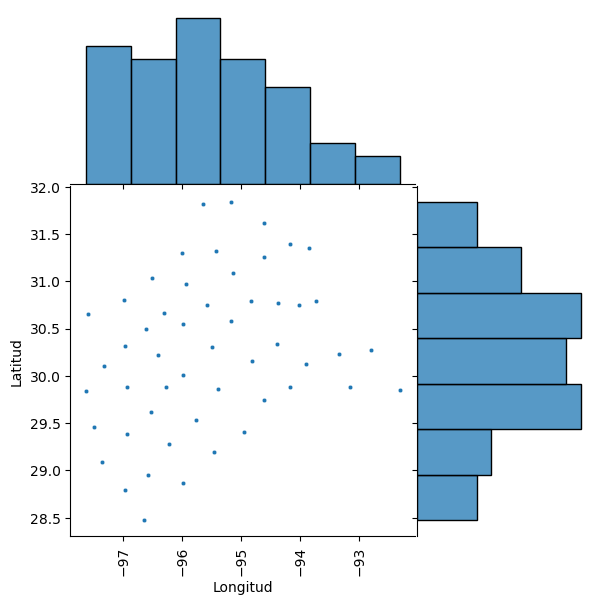

In [27]:
sns.jointplot(data = gdf[['Latitud', 'Longitud', 'HC8187']], x = "Longitud", y = "Latitud",
              kind = 'scatter', ratio = 2, s = 10, space = 0.01, dropna = True)
plt.xticks(rotation = 90)
plt.title("Distribución del NDVI")
plt.show()

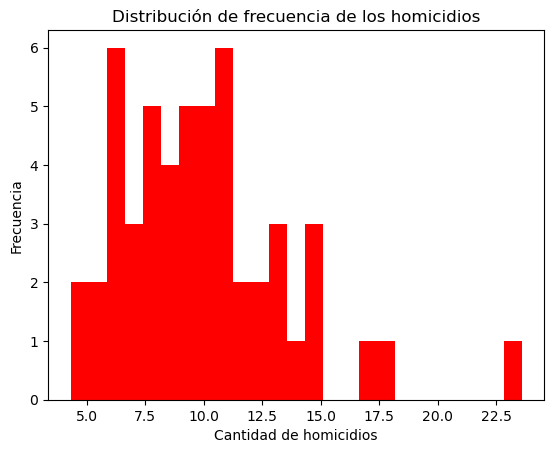

In [29]:
plt.hist(gdf.iloc[:,10], bins = 25, color = "red", linewidth= 0.5)
plt.title("Distribución de frecuencia de los homicidios")
plt.xlabel("Cantidad de homicidios")
plt.ylabel("Frecuencia")
plt.show()

In [37]:
gdf['HC8187'].describe()

count      52.000000
mean      121.442308
std       620.156603
min         3.000000
25%        10.000000
50%        17.000000
75%        36.000000
max      4495.000000
Name: HC8187, dtype: float64

In [42]:
gdf[gdf['HC8187'] == gdf['HC8187'].max()]

,Longitud,Latitud,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,HR8187,HR8791,HR9195,HC8187,HC8791,HC9195,PO8187,PO8791,PO9195,PE77,PE82,PE87,RDAC80,RDAC85,RDAC90,geometry
34,-95.399975,29.861145,Harris,Texas,48,201,48201,48,201,48201,23.572686,21.206444,18.83936,4495,2965,2831,19068680,13981599,15027050,5.857145,5.463577,5.656674,-0.47873,-0.057745,0.194976,"POLYGON ((-95.21633 29.56652, -95.25495 29.561..."


In [52]:
m = gdf.explore(column = 'HR8187', legend = True, missing_kwds = {'color': 'lightgrey'})
gdf["centroides"].explore(m=m,color="blue", marker_kwds=dict(radius=2, fill=True))

In [53]:
m = gdf.explore(column = 'HR8791', legend = True, missing_kwds = {'color': 'lightgrey'})
gdf["centroides"].explore(m=m,color="blue", marker_kwds=dict(radius=2, fill=True))

In [54]:
m = gdf.explore(column = 'HR9195', legend = True, missing_kwds = {'color': 'lightgrey'})
gdf["centroides"].explore(m=m,color="blue", marker_kwds=dict(radius=2, fill=True))

<font style="font-size:1em; color:green"> 4.2. Visualización del kernel de densidad </font> 

In [57]:
# Promedios
gdf[['Latitud', 'Longitud', 'HR8187', 'HR8791', 'HR9195']].mean()

Latitud     30.261055
Longitud   -95.522228
HR8187       9.938272
HR8791       9.257717
HR9195       8.357810
dtype: float64

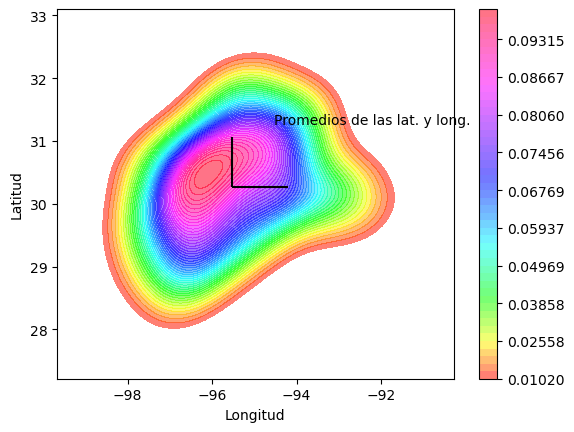

In [63]:
sns.kdeplot(
    data = gdf[['Latitud', 'Longitud', 'HR8187', 'HR8791', 'HR9195']], x = "Longitud", y = "Latitud",
    n_levels = 50,
    fill = True,
    alpha = 0.55,
    cmap = "hsv", cbar = True,
    bw_method = "silverman", # "scott"
    bw_adjust = 1 # Factor que escala multiplicativamente el valor elegido usando bw_method. Entre más alto hará que la curva sea más suave.
)

plt.vlines(gdf['Longitud'].mean(), gdf['Latitud'].mean() + gdf['Latitud'].std(), gdf['Latitud'].mean(), color = "black")
plt.hlines(gdf['Latitud'].mean(), gdf['Longitud'].mean() + gdf['Longitud'].std(), gdf['Longitud'].mean(), color="black")
plt.annotate("Promedios de las lat. y long.", (gdf['Longitud'].mean() + 1, gdf['Latitud'].mean() + 1))
plt.show()

El punto medio de la distribución difiere de los puntos medios de latidud y longitud

In [64]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x - x.mean()) / x.std(), axis = 0)

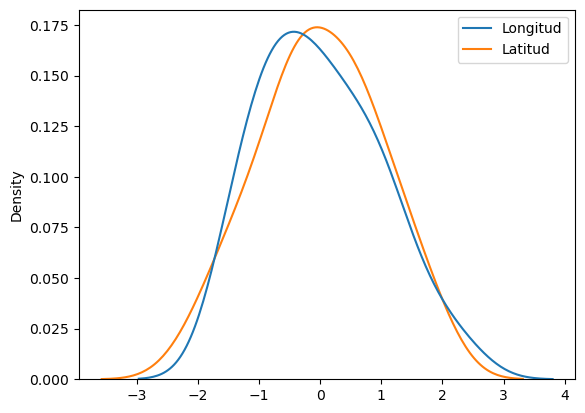

In [67]:
sns.kdeplot(data = mean_norm(gdf.iloc[:, [0, 1]]))
plt.show()

La longitud posee un desplazamiento hacia el costado izquierdo, mientras la latitud posee una distribución cercana a la normal

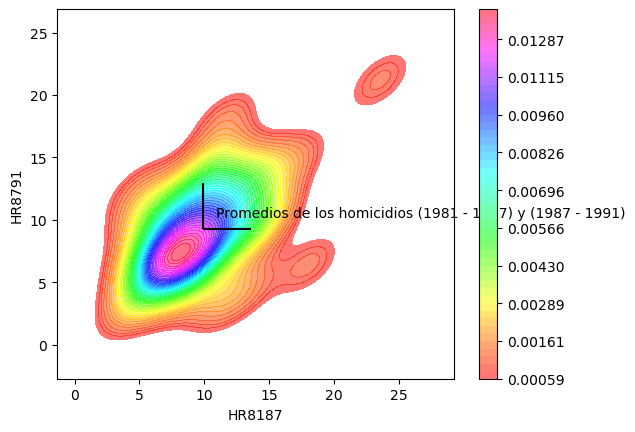

In [76]:
x = "HR8187"
y = "HR8791"

sns.kdeplot(
    data = gdf[['Latitud', 'Longitud', 'HR8187', 'HR8791', 'HR9195']], x = x, y = y,
    n_levels = 50,
    fill = True,
    alpha = 0.55,
    cmap = "hsv", cbar = True,
    bw_method = "silverman", # "scott"
    bw_adjust = 1 # Factor que escala multiplicativamente el valor elegido usando bw_method. Entre más alto hará que la curva sea más suave.
)

plt.vlines(gdf[x].mean(), gdf[y].mean() + gdf[y].std(), gdf[y].mean(), color = "black")
plt.hlines(gdf[y].mean(), gdf[x].mean() + gdf[x].std(), gdf[x].mean(), color="black")
plt.annotate("Promedios de los homicidios (1981 - 1987) y (1987 - 1991)", (gdf[x].mean() + 1, gdf[y].mean() + 1))
plt.show()

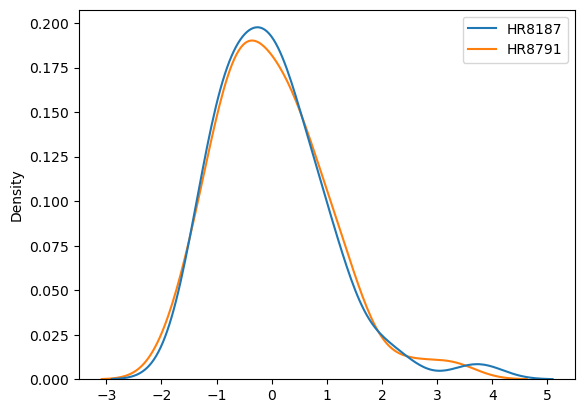

In [72]:
sns.kdeplot(data = mean_norm(gdf.iloc[:, [10,11]]))
plt.show()

El conteo en ambas ventanas temporales posee un desplazamiento al costado izquierdo

In [ ]:
x = "HR8187"
y = "HR8791"

In [78]:
gdf.columns

Index(['Longitud', 'Latitud', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
       'FIPS', 'STFIPS', 'COFIPS', 'FIPSNO', 'HR8187', 'HR8791', 'HR9195',
       'HC8187', 'HC8791', 'HC9195', 'PO8187', 'PO8791', 'PO9195', 'PE77',
       'PE82', 'PE87', 'centroides', 'RDAC80', 'RDAC85', 'RDAC90', 'geometry'],
      dtype='object')

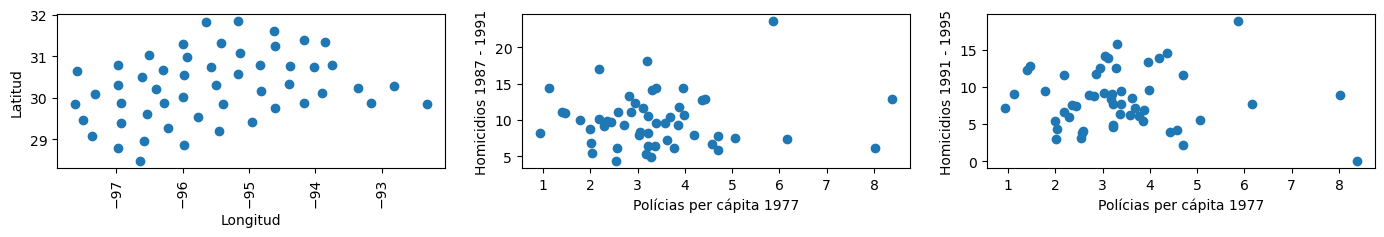

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (17,2))
ax1.scatter(gdf.Longitud, gdf.Latitud)
ax2.scatter(gdf.PE77, gdf.HR8187)
ax3.scatter(gdf.PE77, gdf.HR9195)
ax1.set_xlabel("Longitud")
ax1.set_ylabel("Latitud")
ax1.xaxis.set_tick_params(rotation=90)
ax2.set_xlabel("Polícias per cápita 1977")
ax2.set_ylabel("Homicidios 1987 - 1991")
ax3.set_xlabel("Polícias per cápita 1977")
ax3.set_ylabel("Homicidios 1991 - 1995")
plt.show()

<font style="font-size:1em; color:green"> 4.3. Uso de librería Scikit - Learn para la estimación del Kernel de densidad </font> 

###### Método de validación cruzada

In [84]:
param_grid = {'kernel': ['gaussian', "tophat", "epanechnikov", "exponential", "cosine" ,'linear'],
              'bandwidth' : np.linspace(0.01, 3, 10)
             }

In [85]:
grid = GridSearchCV(
        estimator  = KernelDensity(),
        param_grid = param_grid,
        n_jobs     = -1,
        cv         = LeaveOneOut(), #realiza la validación cruzada para pocos datos
        verbose    = 0
      ) #Validación cruzada

In [88]:
x = mean_norm(gdf.iloc[:, [10,11]].dropna()) #Eliminamos valores ausentes para correr nuestro modelo
a_ = grid.fit(X = x)
# Se mostrarán los mejores parámetros (k y h)
a_.best_params_
modelo_kde =a_.best_estimator_

In [89]:
gdf.columns

Index(['Longitud', 'Latitud', 'NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS',
       'FIPS', 'STFIPS', 'COFIPS', 'FIPSNO', 'HR8187', 'HR8791', 'HR9195',
       'HC8187', 'HC8791', 'HC9195', 'PO8187', 'PO8791', 'PO9195', 'PE77',
       'PE82', 'PE87', 'centroides', 'RDAC80', 'RDAC85', 'RDAC90', 'geometry'],
      dtype='object')

In [90]:
# Grid de valores dentro del rango observado (2 dimensiones)
Xh = np.linspace(min(x.HR8187)*0.8, max(x.HR8187)*1.2, 200) #Rango de datos de la variable homicidios 1981 - 1987
Yh = np.linspace(min(x.HR8791)*0.8, max(x.HR8791)*1.2, 200) #Rango de datos de la variable homicidios 1987 - 1991
xx, yy = np.meshgrid(Xh, Yh) # Grilla con datos de homicidios en dos ventanas temporales
grid = np.column_stack((xx.flatten(), yy.flatten())) # Aplanar y juntar variables

In [91]:
log_densidad_pred = modelo_kde.score_samples(grid)
densidad_pred = np.exp(log_densidad_pred)

Text(0, 0.5, 'Homicidios 1987 - 1991')

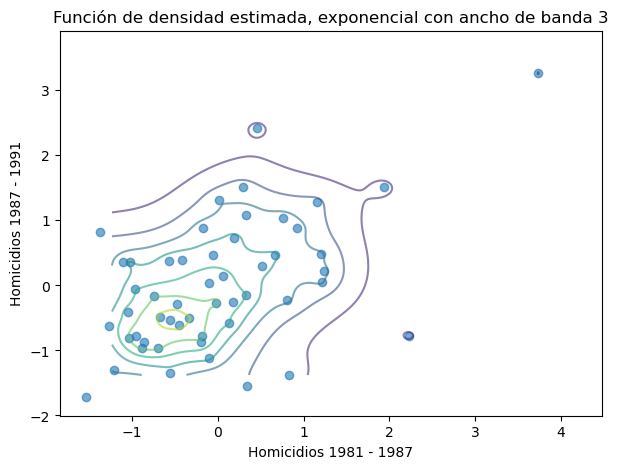

In [92]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))
ax.scatter(x.HR8187, x.HR8791, alpha = 0.6)
ax.contour(
    xx, yy, densidad_pred.reshape(xx.shape),
    alpha = 0.6
)
ax.set_title('Función de densidad estimada, exponencial con ancho de banda 3')
ax.set_xlabel('Homicidios 1981 - 1987')
ax.set_ylabel('Homicidios 1987 - 1991')

Text(0, 0.5, 'Homicidios 1987 - 1991')

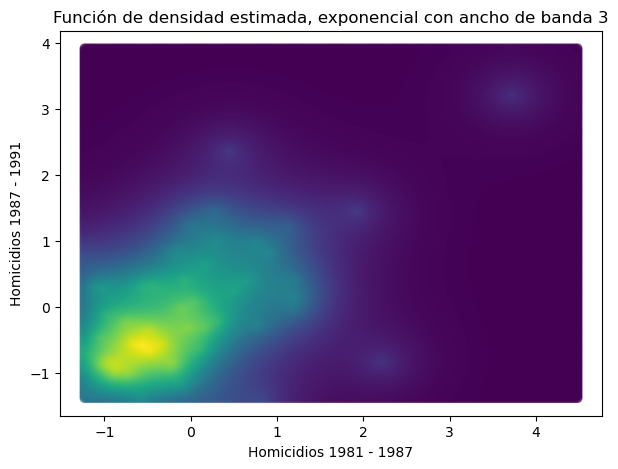

In [93]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (7, 5))
ax.scatter(grid[:,0], grid[:,1], alpha=0.6, c=densidad_pred)
ax.set_title('Función de densidad estimada, exponencial con ancho de banda 3')
ax.set_xlabel('Homicidios 1981 - 1987')
ax.set_ylabel('Homicidios 1987 - 1991')

<font style="font-size:1em; color:green"> 5. Medidas de tendencia central </font> 

In [96]:
# Promedio
promX = gdf.Longitud.mean()
promY = gdf.Latitud.mean()
Promedio = gpd.GeoSeries([Point(promX, promY)])
Promedio

0    POINT (-95.52223 30.26105)
dtype: geometry

In [97]:
# Mediana
medX = gdf.Longitud.median()
medY = gdf.Latitud.median()
Mediana = gpd.GeoSeries([Point(medX, medY)])
Mediana

0    POINT (-95.61306 30.25556)
dtype: geometry

In [101]:
# Desviación estandar
w = 1
x_i = (gdf.Longitud * w) - promX
y_i = (gdf.Latitud * w) - promY
x_i2 = (x_i**2).sum()
y_i2 = (y_i**2).sum()
xi2_yi2 = x_i2 - y_i2
xiyi = (x_i*y_i).sum()
xiyi2 = xiyi**2
theta = np.arctan((xi2_yi2 + np.sqrt(np.abs(xi2_yi2) + 4*xiyi2))/(2*xiyi2))
theta_degree = np.degrees(theta)

n = len(gdf)
ysen = y_i* (np.sin(theta))
ycos = y_i*np.cos(theta)
xsen = x_i*np.sin(theta)
xcos = x_i*np.cos(theta)
sigmax = np.sqrt((1/n) * ((ysen+xcos)**2).sum())
sigmay = np.sqrt((1/n) * ((ycos+xsen)**2).sum())

print('Sigma X: {}\n Sigma Y: {}'.format(sigmax, sigmay))
print('Theta: {}\n Theta (Grados): {}'.format(theta, theta_degree))

Sigma X: 1.3279994001107271
 Sigma Y: 0.8809502203626419
Theta: 0.1719312896833915
 Theta (Grados): 9.850937265099486


In [103]:
# Definir componentes de la elipse
ellipse = ((promX, promY), (sigmax, sigmay), theta_degree)
circ = Point(ellipse[0]).buffer(1)
ell  = shapely.affinity.scale(Point(ellipse[0]).buffer(1), ellipse[1][0], ellipse[1][1]) # Tomamos sigmax y sigmay para crear elipse
ellr = shapely.affinity.rotate(ell,ellipse[2]) # Rotamos la elipse
ellr = gpd.GeoSeries([ellr])

In [104]:
m = gdf.explore("HR8187")
m= gdf["centroides"].explore(m = m, color = "blue", marker_kwds = dict(radius = 2, fill = True))
m = Promedio.explore(m = m, color = "red", marker_kwds = dict(radius = 5, fill = True))
m = Mediana.explore(m = m, color = "green", marker_kwds = dict(radius = 5, fill = True))
ellr.explore(m = m, color = "yellow")

In [ ]:
# Estándares

# Grupos > Uno o varios > Construcciones y terrenos > Componente físico, juridico y económico
# Costos y economía > Modelación de datos
# Norma LADM > Cómo modelar con base en la norma? Incluye la tierra, el valor, el desarrollo (Elementos de la administración de tierras)
# Objetos: Cantidad de objetos, listado > Lindero, límite municipal, departamental, de vereda.
# Objetos en singular
# El subtipo del 3.10 Objeto no es oblgatorio, en caso tal, se deja null
# No existe un estándar para el código, lógica del negocio (1000 > 1100 > 1101). 
# El nombre no es lenguaje de máquina, puede tener espacios. Nombre > Máquina, Alias > Humano 
# Subtipo > Se separa de los demás por una combinación de atributos
# Departamento es de la dirección 
# Grupo: Catastro > Áreas protegidas
# Objetos: Áreas homogéneas de Tierras, Uso del suelo
# Atributos: Título (Puede ser una abreviatura), tipo 
# Dominios: Nombre del atributo, etiqueta, código y definición
# Para el ejercicio (1 grupo), para el Proyecto final (Uno o más grupos)
# Específicación técnica (Modelo de datos) > Hacer referencia a ... Cátalogo de objetos ...
# El tema del ejercicio puede ser mejor que el Proyecto final

# Realizar el tema, objeto a lenguaje UML > ISO > 19109 (Lenguaje de Esquema Conceptual)

# 
# 
# 